In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("CH14PR1_bottlereturn1.txt", sep='\s+', header=None,names=['Xj','Nj','Yj'])
print(df)

     Xj     Nj     Yj
0   2.0  500.0   72.0
1   5.0  500.0  103.0
2  10.0  500.0  170.0
3  20.0  500.0  296.0
4  25.0  500.0  406.0
5  30.0  500.0  449.0


### a. Plot the estimated proportions 𝑝𝑗 = 𝑌𝑗/𝑛𝑗 against 𝑋𝑗. Does the plot support theanalyst’s belief that the logistic response function is appropriate?

In [4]:
Xj = df['Xj']
Nj = df['Nj']
Yj = df['Yj']
pj=[] #an empty list to hold values of Pj

C:\Users\tanvu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


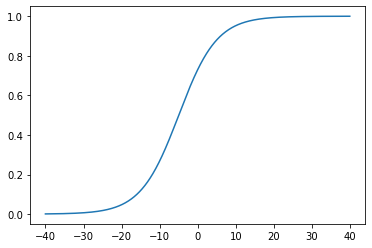

In [5]:
def logistic(x):
  return (1 / (1 + np.exp(-1 - 0.2*x)))

x = np.arange(start=-40, stop=40, step=0.1)
sns.lineplot(x, logistic(x))
plt.show()

In [6]:
#estimate proportions pj
Pj=Yj/Nj
for i in Pj:
    pj.append(Pj)
print(pj)
    

[0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64, 0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64, 0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64, 0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64, 0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64, 0    0.144
1    0.206
2    0.340
3    0.592
4    0.812
5    0.898
dtype: float64]


<AxesSubplot:xlabel='Xj'>

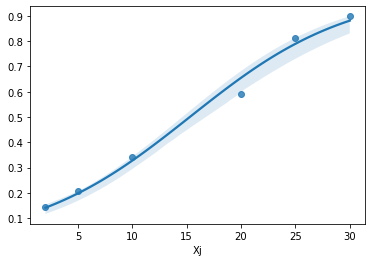

In [7]:
sns.regplot(x= Xj, y=Pj,data=df, logistic= True)

### b. Find the maximum likelihood estimates of 𝛽0 and 𝛽1. State the fitted responsefunction

In [8]:
import statsmodels.api as sm
X = sm.add_constant(df['Xj'])
print(X.head())
logit_model = sm.GLM(Pj, X, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

   const    Xj
0    1.0   2.0
1    1.0   5.0
2    1.0  10.0
3    1.0  20.0
4    1.0  25.0
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.0908
Date:                Sat, 10 Dec 2022   Deviance:                     0.024363
Time:                        22:24:53   Pearson chi2:                   0.0246
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3060
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [9]:
logit_results.params

const   -2.076565
Xj       0.135851
dtype: float64

a =  -2.0766 + 0.1359 X1  

Logistic regression model is: $\pi = \frac{exp(a)}{1 + exp(a)}$ 

### c. Obtain a scatter plot of the data with the estimated proportions from part (a), and superimpose the fitted logistic response function from part (b). Does the fitted logisticresponse function appear to fit well?

C:\Users\tanvu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanvu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Xj', ylabel='Xj'>

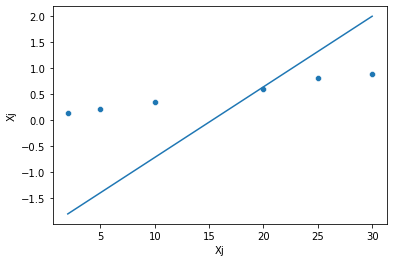

In [27]:
a = -2.0766 + 0.1359*Xj
sns.scatterplot(Xj, Pj)
sns.lineplot(Xj, a)

### d. Obtain 𝑒𝑥𝑝(𝑏1) and interpret this number

In [10]:
beta0 = logit_results.params[0]
beta1 = logit_results.params[1]

In [11]:
# odd ratio
OR = np.exp(beta1)
print(OR)

1.1455109481658934


### As exp(b1) =1.14 >1, so for every time the deposit level increases (X1), the number of bottles returned by 1.145 times

### e. What is the estimated probability that a bottle will be returned when the deposit is 15cents?


In [12]:
#  calculate the probability corresponding to X
def logistic(a):
  return (np.exp(a) / (1 + np.exp(a)))

beta0 = logit_results.params[0]
beta1 = logit_results.params[1]
a =  -2.0766 + 0.1359*15 
pi = logistic(a)

print(pi)

0.4904761520482053


### The estimated probability that a bottle will be returned when the deposit is 15 cents= 0.4904761520482053

### f. Estimate the amount of deposit for which 75 cents of the bottles are expected to bereturned.

In [14]:
b=np.log(3)
b

1.0986122886681098

In [15]:
beta0 = logit_results.params[0]
beta1 = logit_results.params[1]

In [17]:
de=(b-beta0)/beta1
de

23.372533976602604

### For 75 cents of the bottles to be returned, the amount of deposits must be 23.372